In [1]:
# use print only as a function
from __future__ import print_function
import sys
sys.version_info

sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)

In [2]:
__author__ = 'swe03'

import argparse

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.pyplot as pplt
from decimal import *

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from scipy import stats

desired_width = 250
pd.set_option('display.width',desired_width)

In [3]:
#!pip install seaborn

In [4]:
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
import statsmodels.tsa as tsa
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
#!pip install pandasql
from pandasql import PandaSQL 
pdsql = PandaSQL()

##### Read the BQ tables created in the Dst Addr and Port profile 1 or Iterate and Create ADS's 1 programs

In [6]:
#!pip install google-api-python-client
p53_ts = pd.read_gbq("select * from prod.ts_port_53_4wks", project_id="network-sec-analytics")
#p53_ts

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 672 rows.

Total time taken 0.84 s.
Finished at 2016-12-29 09:06:41.


In [7]:
p53_ts=p53_ts.sort_values(['date_hour'],ascending=True)
#p53_ts

In [8]:
# Create an Hour only variable for the Seasonal Dummies variable creation
p53_ts['hour'] = p53_ts.date_hour.dt.strftime('%H')  # This works and creates a Series with Date and Hour

In [9]:
p53_ts

,date_hour,dst_port,count,max,bytes_mean,min,hour
228,2016-11-20 00:00:00,53,55,576,143.29,61,00
57,2016-11-20 01:00:00,53,51,722,154.22,63,01
433,2016-11-20 02:00:00,53,59,408,146.71,66,02
310,2016-11-20 03:00:00,53,55,576,135.29,63,03
428,2016-11-20 04:00:00,53,59,432,130.32,67,04
171,2016-11-20 05:00:00,53,51,576,141.29,63,05
342,2016-11-20 06:00:00,53,58,552,145.21,67,06
75,2016-11-20 07:00:00,53,55,558,145.96,60,07
397,2016-11-20 08:00:00,53,57,516,155.09,65,08
201,2016-11-20 09:00:00,53,52,408,135.52,67,09


In [10]:
test_ts = pdsql("SELECT * FROM p53_ts p limit 10;",locals())
test_ts

,date_hour,dst_port,count,max,bytes_mean,min,hour
0,2016-11-20 00:00:00.000000,53,55,576,143.29,61,00
1,2016-11-20 01:00:00.000000,53,51,722,154.22,63,01
2,2016-11-20 02:00:00.000000,53,59,408,146.71,66,02
3,2016-11-20 03:00:00.000000,53,55,576,135.29,63,03
4,2016-11-20 04:00:00.000000,53,59,432,130.32,67,04
5,2016-11-20 05:00:00.000000,53,51,576,141.29,63,05
6,2016-11-20 06:00:00.000000,53,58,552,145.21,67,06
7,2016-11-20 07:00:00.000000,53,55,558,145.96,60,07
8,2016-11-20 08:00:00.000000,53,57,516,155.09,65,08
9,2016-11-20 09:00:00.000000,53,52,408,135.52,67,09


In [11]:
for index, row in test_ts.iterrows():
    for i in range(0, 9):
        if int(row['hour']) == i:
            test_ts['hvar'+ str(i)] = 1
            print("in 1 value: ", test_ts.ix[i,0:8])
        else:
            test_ts['hvar'+ str(i)] = 0
 

in 1 value:  date_hour     2016-11-20 00:00:00.000000
dst_port                              53
count                                 55
max                                  576
bytes_mean                        143.29
min                                   61
hour                                  00
hvar0                                  1
Name: 0, dtype: object
in 1 value:  date_hour     2016-11-20 01:00:00.000000
dst_port                              53
count                                 51
max                                  722
bytes_mean                        154.22
min                                   63
hour                                  01
hvar0                                  0
Name: 1, dtype: object
in 1 value:  date_hour     2016-11-20 02:00:00.000000
dst_port                              53
count                                 59
max                                  408
bytes_mean                        146.71
min                                   66
hour         

In [12]:
test_ts

,date_hour,dst_port,count,max,bytes_mean,min,hour,hvar0,hvar1,hvar2,hvar3,hvar4,hvar5,hvar6,hvar7,hvar8
0,2016-11-20 00:00:00.000000,53,55,576,143.29,61,00,0,0,0,0,0,0,0,0,0
1,2016-11-20 01:00:00.000000,53,51,722,154.22,63,01,0,0,0,0,0,0,0,0,0
2,2016-11-20 02:00:00.000000,53,59,408,146.71,66,02,0,0,0,0,0,0,0,0,0
3,2016-11-20 03:00:00.000000,53,55,576,135.29,63,03,0,0,0,0,0,0,0,0,0
4,2016-11-20 04:00:00.000000,53,59,432,130.32,67,04,0,0,0,0,0,0,0,0,0
5,2016-11-20 05:00:00.000000,53,51,576,141.29,63,05,0,0,0,0,0,0,0,0,0
6,2016-11-20 06:00:00.000000,53,58,552,145.21,67,06,0,0,0,0,0,0,0,0,0
7,2016-11-20 07:00:00.000000,53,55,558,145.96,60,07,0,0,0,0,0,0,0,0,0
8,2016-11-20 08:00:00.000000,53,57,516,155.09,65,08,0,0,0,0,0,0,0,0,0
9,2016-11-20 09:00:00.000000,53,52,408,135.52,67,09,0,0,0,0,0,0,0,0,0


In [13]:
# Need a new Feature created since we repurpose date_hour as Index below
p53_ts['Date_Hour'] = p53_ts['date_hour']
#p53_ts

In [14]:
#Need an Index for the Seasonal Decompostion below
p53_ts.reset_index(inplace=True)
p53_ts = p53_ts.set_index('date_hour')
p53_ts.index.dtype      # Note in the output:dtype('<M8[ns]') but...  np.dtype('datetime64[ns]') = np.dtype('<M8[ns]'):

dtype('<M8[ns]')

##### Execute some Univariate Statistics

In [15]:
p53_ts['bytes_mean'].describe()

count     672.000000
mean      152.840908
std       224.403124
min       105.840000
25%       130.797500
50%       139.000000
75%       147.482500
max      5624.690000
Name: bytes_mean, dtype: float64

In [17]:
# Remove the Outliers
p53_ts[p53_ts['bytes_mean'] >1000] = 150
p53_ts['bytes_mean'].describe()

count    672.000000
mean     142.010074
std       28.014244
min      105.840000
25%      130.797500
50%      139.000000
75%      147.482500
max      707.840000
Name: bytes_mean, dtype: float64

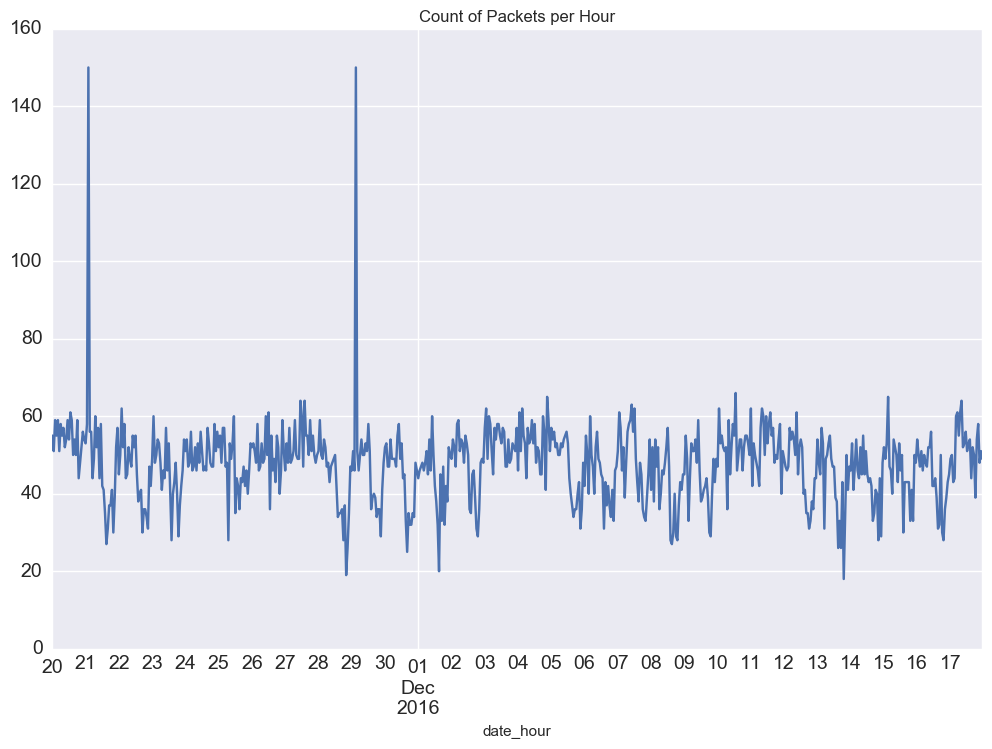

In [18]:
# This plots all of the variables
#p53_ts.plot(figsize=(12,8), title= 'Mean Packet Size in Bytes', fontsize=14)

#p53_ts.bytes_mean.plot(figsize=(12,8), title= 'Mean Packet Size in Bytes', fontsize=14)
p53_ts['count'].plot(figsize=(12,8), title= 'Count of Packets per Hour', fontsize=14)
plt.savefig('Packet_Count.png', bbox_inches='tight')

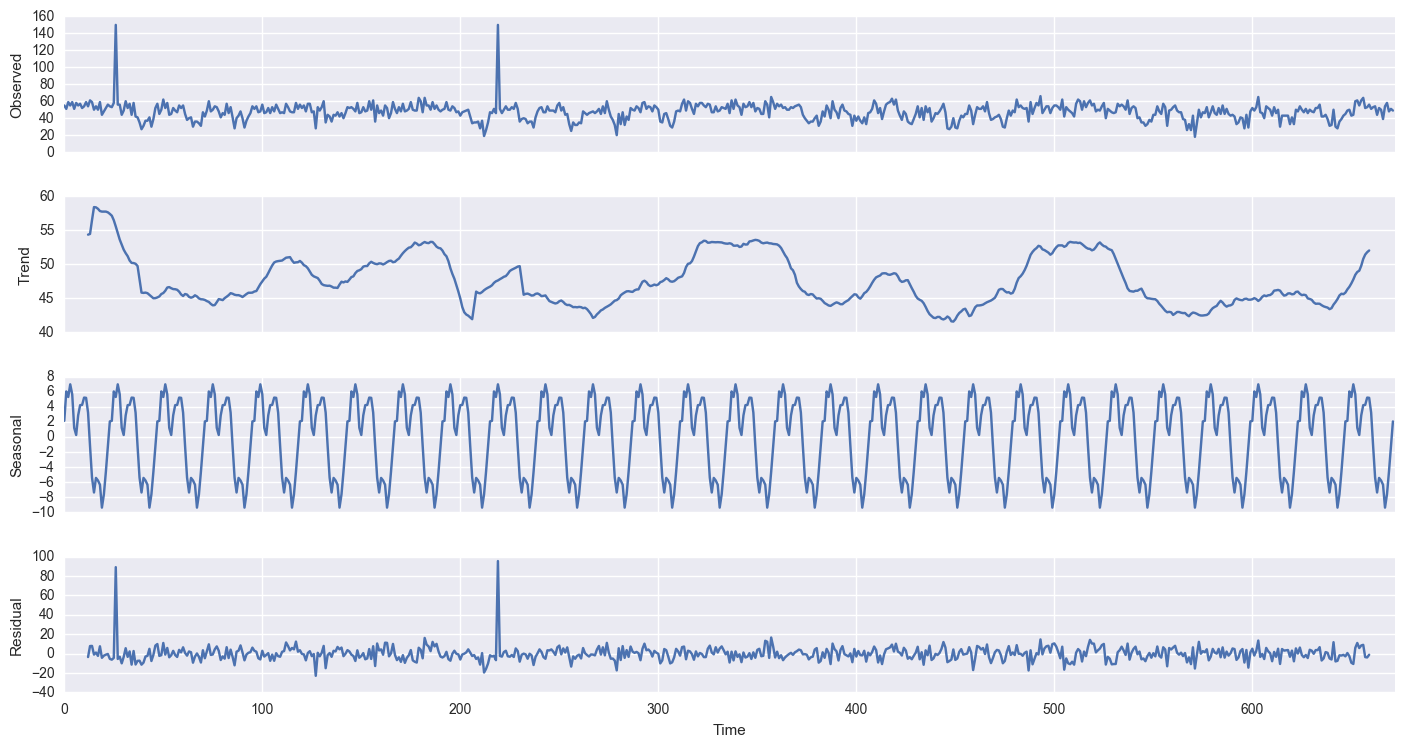

In [19]:
decomposition = seasonal_decompose(p53_ts['count'].values,freq=24)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [21]:
mod = sm.tsa.statespace.SARIMAX(p53_ts['count'], exog=p53_ts['bytes_mean'], trend='n', order=(5,0,0), seasonal_order=(5,0,0,24))
results = mod.fit()
print(results.summary())

/Users/swe03/anaconda/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              count   No. Observations:                  672
Model:             SARIMAX(5, 0, 0)x(5, 0, 0, 24)   Log Likelihood               -2429.499
Date:                            Wed, 28 Dec 2016   AIC                           4882.998
Time:                                    14:12:17   BIC                           4937.122
Sample:                                11-20-2016   HQIC                          4903.960
                                     - 12-17-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
bytes_mean     0.0098      0.013      0.762      0.446      -0.015       0.035
ar.L1          0.2848      0.021   

In [37]:
dir(tsa)

['Tester',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 'adfvalues',
 'api',
 'ar_model',
 'arima_model',
 'arima_process',
 'base',
 'filters',
 'interp',
 'kalmanf',
 'seasonal',
 'stattools',
 'test',
 'tsatools',
 'vector_ar',
 'x13']

In [41]:
!pip install '/home/swe03/anaconda/lib/python2.7/site-packages/statsmodels'

Invalid requirement: '/home/swe03/anaconda/lib/python2.7/site-packages/statsmodels'
It looks like a path. Does it exist ?


In [38]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 2.7.9.final.0
python-bits: 64
OS: Linux
OS-release: 3.16.0-4-amd64
machine: x86_64
processor: 
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.19.1
nose: None
pip: 9.0.1
setuptools: 28.8.0
Cython: None
numpy: 1.11.2
scipy: 0.18.0
statsmodels: 0.6.1
xarray: None
IPython: 5.1.0
sphinx: None
patsy: 0.4.1
dateutil: 2.5.0
pytz: 2016.7
blosc: None
bottleneck: None
tables: None
numexpr: None
matplotlib: 1.5.3
openpyxl: None
xlrd: None
xlwt: None
xlsxwriter: None
lxml: None
bs4: 4.5.1
html5lib: None
httplib2: 0.9.2
apiclient: 1.5.1
sqlalchemy: 1.1.4
pymysql: None
psycopg2: None
jinja2: 2.8
boto: None
pandas_datareader: None
